## Loading Packages

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

## Reading data

In [2]:
train =pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

In [3]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [4]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,8.699515,0.391667,5608.333333


In [5]:
test.isna().sum()

Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_Income_log           0
EMI                        0
Balance Income             0
dtype: int64

In [6]:
train['EMI'].fillna(train['EMI'].median(), inplace=True)
train['Balance Income'].fillna(train['Balance Income'].median(), inplace=True)

test['EMI'].fillna(test['EMI'].median(), inplace=True)
test['Balance Income'].fillna(test['Balance Income'].median(), inplace=True)

In [7]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [8]:
X.head(1)

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance Income
0,1.0,4.85203,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,8.674026,0.355556,5493.444444


We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

Now we will train the model on training dataset and make predictions for the test dataset. 

# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=1)  
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

In [12]:
#Let us calculate how accurate our predictions are by calculating the accuracy.

accuracy_score(y_cv,pred_cv)

0.7351351351351352

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

1. The validation set approach
2. k-fold cross validation
3. Leave one out cross validation (LOOCV)
4. Stratified k-fold cross validation

In [15]:
from sklearn.model_selection import StratifiedKFold

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))  
    xtr,xvl = X.loc[train_index],X.loc[test_index]  
    ytr,yvl = y[train_index],y[test_index]  
    model = DecisionTreeClassifier(random_state=1)   
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test)  
    print('accuracy_score',score)  
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7235772357723578

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.680327868852459


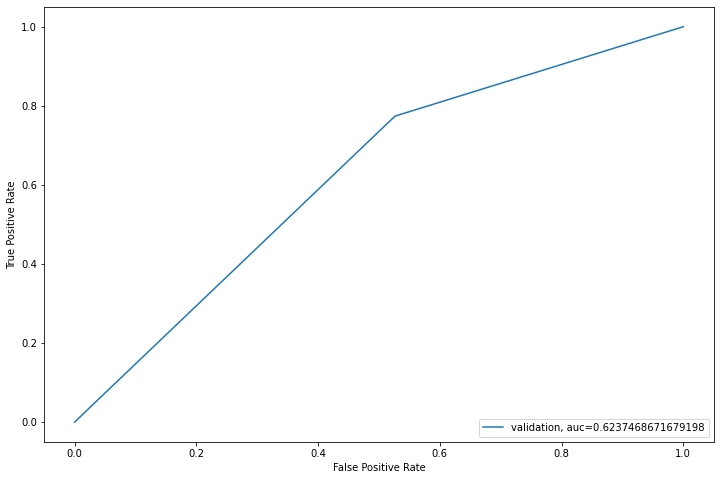

In [16]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

# Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.



In [17]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))  
    xtr,xvl = X.loc[train_index],X.loc[test_index]  
    ytr,yvl = y[train_index],y[test_index]  
    model = RandomForestClassifier(random_state=1, max_depth=10)   
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test)  
    print('accuracy_score',score)  
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639


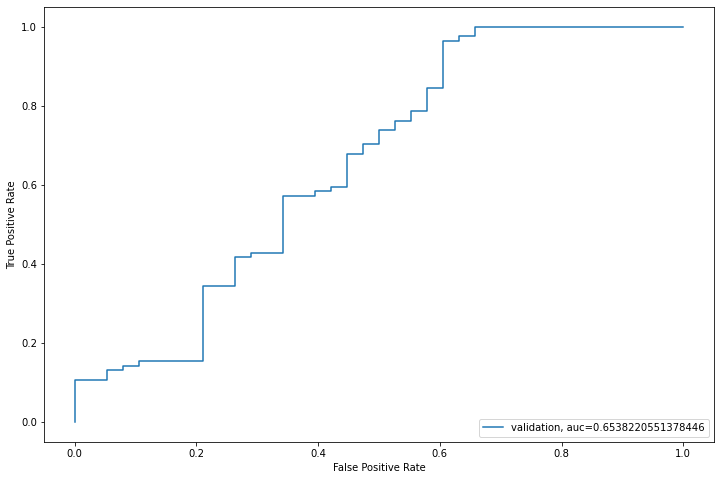

In [18]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()